In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from scipy.stats import linregress

### **Setting 1**

**Load ground truth and NPE posterior means:**

In [2]:
setting1_npe = torch.load("npe_credible_intervals_setting1.pt", weights_only=False)

shear1_true = setting1_npe["shear1_true"]
shear2_true = setting1_npe["shear2_true"]
shear1_npe = setting1_npe["shear1_posteriormean"]
shear2_npe = setting1_npe["shear2_posteriormean"]

In [3]:
setting1_anacal = torch.load("anacal_results_setting1.pt", weights_only=False)
e1_avg = setting1_anacal["e1_sum"] / setting1_anacal["num_detections"]
e2_avg = setting1_anacal["e2_sum"] / setting1_anacal["num_detections"]
R1 = setting1_anacal["e1g1_sum"].sum() / setting1_anacal["num_detections"].sum()
R2 = setting1_anacal["e2g2_sum"].sum() / setting1_anacal["num_detections"].sum()
shear1_anacal = torch.tensor(e1_avg / R1)
shear2_anacal = torch.tensor(e2_avg / R2)

**Compute RMSEs and Pearson correlation coefficients:**

In [4]:
print(f"shear 1 test RMSE (NPE) = {((shear1_true - shear1_npe) ** 2).mean().sqrt()}")
print(f"shear 1 test RMSE (AnaCal) = {((shear1_true - shear1_anacal) ** 2).mean().sqrt()}")

print(f"shear 2 test RMSE (NPE) = {((shear2_true - shear2_npe) ** 2).mean().sqrt()}")
print(f"shear 2 test RMSE (AnaCal) = {((shear2_true - shear2_anacal) ** 2).mean().sqrt()}")

shear 1 test RMSE (NPE) = 0.001254480448551476
shear 1 test RMSE (AnaCal) = 0.006460898794351315
shear 2 test RMSE (NPE) = 0.0014834729954600334
shear 2 test RMSE (AnaCal) = 0.008464338835013508


In [5]:
print(
    f"shear 1 pearson correlation (NPE) = {np.corrcoef(shear1_true.flatten().cpu(), shear1_npe.flatten().cpu())[1, 0]}"
)
print(
    f"shear 1 pearson correlation (AnaCal) = {np.corrcoef(shear1_true.flatten().cpu(), shear1_anacal.flatten().cpu())[1, 0]}"
)

print(
    f"shear 2 pearson correlation (NPE) = {np.corrcoef(shear2_true.flatten().cpu(), shear2_npe.flatten().cpu())[1, 0]}"
)
print(
    f"shear 2 pearson correlation (AnaCal) = {np.corrcoef(shear2_true.flatten().cpu(), shear2_anacal.flatten().cpu())[1, 0]}"
)

shear 1 pearson correlation (NPE) = 0.9967054136338519
shear 1 pearson correlation (AnaCal) = 0.9228774592722016
shear 2 pearson correlation (NPE) = 0.9962937306247405
shear 2 pearson correlation (AnaCal) = 0.9160921778935677


**Compute additive and multiplicative biases:**

In [6]:
lr1_npe = linregress(shear1_true.flatten().cpu().numpy(), shear1_npe.flatten().cpu().numpy())
lr1_anacal = linregress(shear1_true.flatten().cpu().numpy(), shear1_anacal.flatten().cpu().numpy())
print("Shear 1:")
print(
    f"NPE: c ± 3SE = {lr1_npe.intercept:.6f} ± {3 * lr1_npe.intercept_stderr:.6f}, m ± 3SE = {lr1_npe.slope - 1:.6f} ± {3 * lr1_npe.stderr}"
)
print(
    f"AnaCal: c ± 3SE = {lr1_anacal.intercept:.6f} ± {3 * lr1_anacal.intercept_stderr:.6f}, m ± 3SE = {lr1_anacal.slope - 1:.6f} ± {3 * lr1_anacal.stderr}\n"
)

lr2_npe = linregress(shear2_true.flatten().cpu().numpy(), shear2_npe.flatten().cpu().numpy())
lr2_anacal = linregress(shear2_true.flatten().cpu().numpy(), shear2_anacal.flatten().cpu().numpy())
print("Shear 2:")
print(
    f"NPE: c ± 3SE = {lr2_npe.intercept:.6f} ± {3 * lr2_npe.intercept_stderr:.6f}, m ± 3SE = {lr2_npe.slope - 1:.6f} ± {3 * lr2_npe.stderr}"
)
print(
    f"AnaCal: c ± 3SE = {lr2_anacal.intercept:.6f} ± {3 * lr2_anacal.intercept_stderr:.6f}, m ± 3SE = {lr2_anacal.slope - 1:.6f} ± {3 * lr2_anacal.stderr}\n"
)

Shear 1:
NPE: c ± 3SE = -0.000268 ± 0.000035, m ± 3SE = -0.022258 ± 0.002387150450484668
AnaCal: c ± 3SE = -0.000101 ± 0.000193, m ± 3SE = 0.040572 ± 0.013027447172352288

Shear 2:
NPE: c ± 3SE = 0.000702 ± 0.000039, m ± 3SE = -0.005630 ± 0.002575764123305337
AnaCal: c ± 3SE = -0.004629 ± 0.000211, m ± 3SE = 0.057869 ± 0.013892064645991232



**Plot true versus predicted shear:**

In [7]:
alpha = 0.25
s = 10
fontsize = 14
ticklabelsize = 8
npe_color = "#1c692b"
anacal_color = "#c231c2"
axmin = -0.06
axmax = 0.06

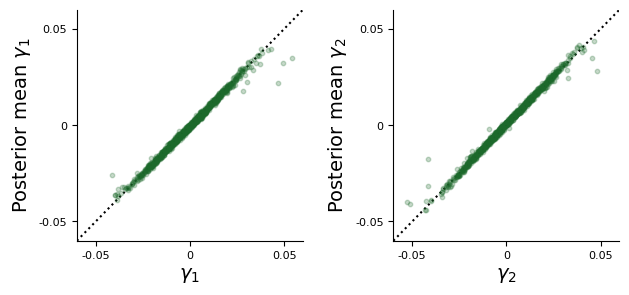

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(7, 3))

np.random.seed(0)
n_samples = len(shear1_true)
indexes = np.random.choice(n_samples, 1000, replace=False)

# Shear 1
_ = ax[0].scatter(
    shear1_true[indexes].flatten().cpu().numpy(),
    shear1_npe[indexes].flatten().cpu().numpy(),
    color=npe_color,
    alpha=alpha,
    s=s,
    zorder=1,
)
_ = ax[0].axline((0, 0), slope=1, linestyle=":", color="black", zorder=0)

_ = ax[0].set_xlabel(r"$\gamma_1$", fontsize=fontsize)
_ = ax[0].set_ylabel(r"Posterior mean $\gamma_1$", fontsize=fontsize)
_ = ax[0].tick_params(axis="both", which="major", labelsize=ticklabelsize)
_ = ax[0].set_xlim((axmin, axmax))
_ = ax[0].set_ylim((axmin, axmax))

# Shear 2
_ = ax[1].scatter(
    shear2_true[indexes].flatten().cpu().numpy(),
    shear2_npe[indexes].flatten().cpu().numpy(),
    color=npe_color,
    alpha=alpha,
    s=s,
    zorder=1,
)
_ = ax[1].axline((0, 0), slope=1, linestyle=":", color="black", zorder=0)

_ = ax[1].set_xlabel(r"$\gamma_2$", fontsize=fontsize)
_ = ax[1].set_ylabel(r"Posterior mean $\gamma_2$", fontsize=fontsize)
_ = ax[1].tick_params(axis="both", which="major", labelsize=ticklabelsize)
_ = ax[1].set_xlim((axmin, axmax))
_ = ax[1].set_ylim((axmin, axmax))

for a in ax.flat:
    _ = a.spines[["top", "right"]].set_visible(False)
    _ = a.set_xlim(axmin, axmax)
    _ = a.set_ylim(axmin, axmax)
    _ = a.set_xticks([-0.05, 0, 0.05], [-0.05, 0, 0.05])
    _ = a.set_yticks([-0.05, 0, 0.05], [-0.05, 0, 0.05])
    _ = a.tick_params(axis="both", which="major", labelsize=ticklabelsize)

fig.subplots_adjust(wspace=0.4)

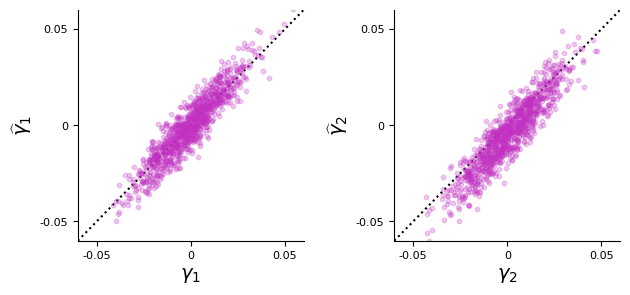

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(7, 3))

# Shear 1
_ = ax[0].scatter(
    shear1_true[indexes].flatten().cpu().numpy(),
    shear1_anacal[indexes].flatten().cpu().numpy(),
    color=anacal_color,
    alpha=alpha,
    s=s,
    zorder=1,
)
_ = ax[0].axline((0, 0), slope=1, linestyle=":", color="black", zorder=0)

_ = ax[0].set_xlabel(r"$\gamma_1$", fontsize=fontsize)
_ = ax[0].set_ylabel(r"$\widehat{\gamma}_1$", fontsize=fontsize)
_ = ax[0].tick_params(axis="both", which="major", labelsize=ticklabelsize)
_ = ax[0].set_xlim((axmin, axmax))
_ = ax[0].set_ylim((axmin, axmax))

# Shear 2
_ = ax[1].scatter(
    shear2_true[indexes].flatten().cpu().numpy(),
    shear2_anacal[indexes].flatten().cpu().numpy(),
    color=anacal_color,
    alpha=alpha,
    s=s,
    zorder=1,
)
_ = ax[1].axline((0, 0), slope=1, linestyle=":", color="black", zorder=0)

_ = ax[1].set_xlabel(r"$\gamma_2$", fontsize=fontsize)
_ = ax[1].set_ylabel(r"$\widehat{\gamma}_2$", fontsize=fontsize)
_ = ax[1].tick_params(axis="both", which="major", labelsize=ticklabelsize)
_ = ax[1].set_xlim((axmin, axmax))
_ = ax[1].set_ylim((axmin, axmax))

for a in ax.flat:
    _ = a.spines[["top", "right"]].set_visible(False)
    _ = a.set_xlim(axmin, axmax)
    _ = a.set_ylim(axmin, axmax)
    _ = a.set_xticks([-0.05, 0, 0.05], [-0.05, 0, 0.05])
    _ = a.set_yticks([-0.05, 0, 0.05], [-0.05, 0, 0.05])
    _ = a.tick_params(axis="both", which="major", labelsize=ticklabelsize)

fig.subplots_adjust(wspace=0.4)